In [45]:
from __future__ import division
import numpy as np
from scipy.stats import entropy
from Parameters_Diffusion import *
import numpy as np
from scipy.stats import entropy


ReferencePrey = np.load('./Solutions/FDSolution_Diffusion.npy')

h=a/(l-1)
discret=int(a/h)
ts=0.1
timesteps_cut = int(deltat * (timesteps-1) / ts)
dx_hist=a/l_coupling
constant=int(ts/deltat)


print(deltat, 'dt', timesteps_cut, 'timesteps_cut', timesteps, 'timesteps')
'''Densities'''

def Discretization(a, discret, Particles): 
    
    '''
    Return the concentration of particles.
    a=domain length
    discret=discrtization parameter (number of cells)
    Particles=list of 2D arrays
    '''
    
    xPositions=[]
    yPositions=[]
    for i in range(len(Particles)):
       
        xPositions.append(Particles[i][0])
        yPositions.append(Particles[i][1])
    
   
    xbins=np.arange(0,a+h, h)
    ybins=np.arange(0,a+h, h)
    concentration, xbins, ybins=np.histogram2d(xPositions, yPositions, bins=(xbins, ybins), weights=np.ones_like(xPositions)/(h**2))
   
    return concentration
    
def HybridPlot(Average, Reference, bd):
    '''
    Creates hybrid plots, where the right side corresponds to the FD solution
    and the left side to the mean-field concentration obtained from the coupling.
    Average=mean-field concentration
    Concentration=FD solution
    bd=location of the boundary
    '''

    listH = []  # list of Hybrid solutions
    listR = []  # list of Reference solutions
    
   
    if len(Average)!=timesteps_cut:
        print('error')
        
    for t in range(timesteps_cut):
        Ref_t=Reference[(t+1)*constant]
        Average_t = np.transpose(Average[t]) 
        # create matrix fromt he particle discretization
        Particle = np.zeros(shape=(l_coupling,l_coupling))
        
        for i in range(l_coupling):
            for j in range(int(l_coupling / 2) ):
                Particle[i, j] = Average_t[i, j]
            
            for j in range(int(l_coupling / 2)):
                
                Particle[i,j+int(l_coupling/2)]=Ref_t[i,j+int(l_coupling/2)]
        listH.append(Particle)
            
        
    for t in range(timesteps_cut):
        
        Ref_t=Reference[(t+1)*constant]
       
       
        listR.append(Ref_t)

    return listH, listR


def functionAverage(sim): 
    
    '''
    Returns the mean-field concentration for each time-step by averaging over all
    simulations
    PreySimulation=list of all simulations, see Coupling.py
    '''

    
    timesteps_cut = int(deltat * (timesteps-1) / ts)
    
    number_bins=int(a/h)
    
    DiscretePrey=np.empty([sim,timesteps_cut, number_bins,number_bins])
    DiscretePreyAverage=np.empty([timesteps_cut, number_bins,number_bins])


    for s in range(sim):
       
        print(s)
        for t in range(timesteps_cut):
          
            Prey_s_t=np.load(f'/home/htc/bzfkostr/SCRATCH/SimulationsMultiscale/TauDiffusionParticlesM10_{s}_time{t}.npy', allow_pickle=True)
            
            discrete_Prey_s_t=Discretization(a, l_coupling, Prey_s_t)
            
            DiscretePrey[s,t,:,:]=discrete_Prey_s_t

    
    # average over simulations 
    for t in range(timesteps_cut):
        

        DiscretePreyAverage[t,:,:]=np.mean(DiscretePrey[:,t,:,:], axis=0)
       
    return DiscretePreyAverage

sim=50
DiscretePreyAverage=functionAverage(sim)

def JSD(P, Q):

    # go over all time steps
    # Q should be the reference solution
    P_t = P.flatten()
    Q_t = Q.flatten()
    
    # normalize P and Q
    
    norm_Q=np.sum(Q)
    
    P_t=P_t/norm_Q
    Q_t=Q_t/norm_Q

    # calculate JSD

    M = 0.5 * (P_t + Q_t)

    JSD = 0.5 * (entropy(P_t, M) + entropy(Q_t, M))

       

    return JSD


PreyJSDSimulations=np.zeros((sim, len(Times)))


        
HybridPrey, ReferencePrey = HybridPlot(DiscretePreyAverage, ReferencePrey, l_coupling)   



0.002 dt 10 timesteps_cut 501 timesteps
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [46]:
Times=[0,1,2,3,4,5,6,7,8,9]
JSD_Time=np.zeros(len(Times))
for t in Times:
   
    P=HybridPrey[t]
    Q=ReferencePrey[t]
    jsd=JSD(P, Q)
    JSD_Time[t]=jsd
       

# Save results
np.save('./Solutions/JSDTauDiffusionM10.npy',JSD_Time )
print(JSD_Time)

[1.41093872e-04 9.01887698e-05 6.58487917e-05 5.29279823e-05
 4.56354494e-05 4.08510044e-05 3.78791644e-05 3.50442029e-05
 3.32547491e-05 3.26581933e-05]


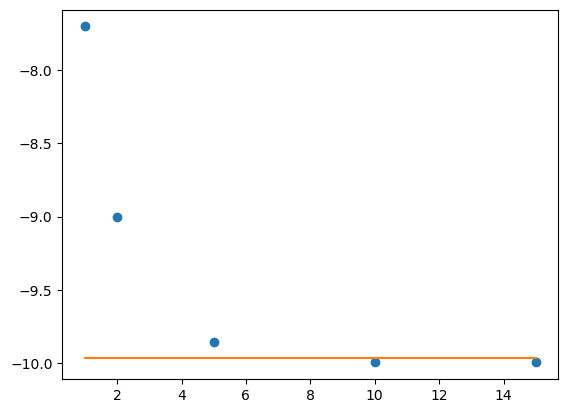

In [48]:
import matplotlib.pyplot as plt
# plot for an overview
JSD1=np.load('./Solutions/JSDTauDiffusionM1.npy')
JSD2=np.load('./Solutions/JSDTauDiffusionM2.npy')
JSD5=np.load('./Solutions/JSDTauDiffusionM5.npy')  
JSD10=np.load('./Solutions/JSDTauDiffusionM10.npy')  
JSD15=np.load('./Solutions/JSDTauDiffusionM15.npy')  
JSDE=np.load('./Solutions/JSDExplicitDiffusion.npy')  
Mvalues=[1,2,5,10,15]
t=3
fig=plt.figure()
plt.plot(Mvalues,np.log([JSD1[t],JSD2[t],JSD5[t],JSD10[t],JSD15[t]]), 'o')
plt.plot(Mvalues, np.log(np.ones(5)*JSDE[t]))
